# Predicting Students' Dropout Rates and Academic Success
Data Mining Midterm Presentation
- Lindsay Spratt, Maeve O'Toole, Duha Kanjo

# A little bit about what the dataset contains...
- This dataset contains data from a higher education institution on various variables related to undergraduate students, including demographics, social-economic factors, and academic performance, to investigate the impact of these factors on student dropout and academic success.

# Some questions we are interested in exploring...
1. (MAEVE) What factors are biggest contributors to assessing the population as a whole?
    - We are assuming age at enrollment, marital status, nationality, and previous qualifications have significant impacts are the top factors...
        - categorical column at first - KModes maybe?
        - take the 'Target', get dummies it and concatenate it to the end of the data set
            - 1 - Dropout
            - 2 - Graduate
            - 3 - Enrolled
            
    
2. (LINDSAY) What societal pressures have an impact on the groups that we found in question 1??
    - examples - gender roles, marital status, and mother’s occupation
    
3. (DUHA) Do evening/nighttime classes have an effect on dropout rates?
    - We can assume that there are outside factors affecting class time as well!
        - example - whether or not the student has a daytime job, child, etc.
  
4. (DUHA) Do scholarships have an incentive for students to stay in school and/or have better grades?
        -make a dummie person, determine where this person would fall

5. (LINDSAY) Debtors.. whether or not financial stress has implications on success rates?
        -make a dummie person, determine where this person would fall
        
AT THE END:

6. (MAEVE) Interested in clustering the data based on the mother’s occupation and then on the father’s occupation and compare it back to the student’s success rates...
    - cut the data according to mother/daughter son/father 
    - metadata- how many females (percent) with a mother over an 18 or under an 18
    - make a new dataframe on data we're looking for (cut datas by rows)
    - KMeans the Target and each mother and father's occupation 
    - Compare back to the 

In [322]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
from sklearn.cluster import KMeans

import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [323]:
# read in the file
# https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention

path = 'medical.csv'
data = pd.read_csv(path)

# display the head of the dataset
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [321]:
data("Gender").unique()

TypeError: 'DataFrame' object is not callable

In [ ]:
# display the tail of the dataset
data.tail()

In [ ]:
# we need to make sure there is enough data.. check length!
len(data)

In [ ]:
# display the columns the dataset contains
data.columns

In [ ]:
# we want to get all the statistical data from the numeric columns
    # a majority of the dataset's columns are numeric
data.describe()

In [ ]:
# dispaly the info of the dataset
data.info()

In [324]:
# start getting rid of unnecessary columns here..
    # drop application mode column
    # drop application order column
    # drop special ed??

data = data.drop(data.iloc[:, 1:3], axis = 1, inplace = False )
data.head()

,Marital status,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,2,1,1,1,13,10,6,10,1,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,11,1,1,1,1,3,4,4,1,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,5,1,1,1,22,27,10,10,1,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,15,1,1,1,23,27,6,4,1,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,3,0,1,1,22,28,10,10,0,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [325]:
from sklearn.preprocessing import StandardScaler

In [326]:
dataset = data.drop_duplicates() #remove any duplicates
numeric_data = dataset.select_dtypes( include = [np.number] )
categorical_data = dataset.select_dtypes( exclude = [np.number] )

print(numeric_data.shape)
print(categorical_data.shape)

(4421, 32)
(4421, 1)


In [327]:
print(numeric_data)

      Marital status  Course  Daytime/evening attendance  \
0                  1       2                           1   
1                  1      11                           1   
2                  1       5                           1   
3                  1      15                           1   
4                  2       3                           0   
...              ...     ...                         ...   
4419               1      15                           1   
4420               1      15                           1   
4421               1      12                           1   
4422               1       9                           1   
4423               1      15                           1   

      Previous qualification  Nacionality  Mother's qualification  \
0                          1            1                      13   
1                          1            1                       1   
2                          1            1                      22   
3  

In [328]:
scaler = StandardScaler()
scaler.fit(numeric_data)
scaled_features = scaler.transform(numeric_data)
scaled_features

array([[-0.29462248, -1.82550767,  0.34980864, ..., -0.28876832,
         0.12505924,  0.7656013 ],
       [-0.29462248,  0.25388097,  0.34980864, ...,  0.87557377,
        -1.1045427 ,  0.34717904],
       [-0.29462248, -1.13237812,  0.34980864, ..., -0.28876832,
         0.12505924,  0.7656013 ],
       ...,
       [-0.29462248,  0.48492416,  0.34980864, ...,  0.87557377,
        -1.1045427 ,  0.34717904],
       [-0.29462248, -0.20820539,  0.34980864, ..., -0.81460024,
        -1.46619033, -1.37495889],
       [-0.29462248,  1.1780537 ,  0.34980864, ...,  0.4248607 ,
         1.78863834, -0.74952772]])

In [329]:
scaled_features = pd.DataFrame(scaled_features, columns = numeric_data.columns)
scaled_features

,Marital status,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,-0.294622,-1.825508,0.349809,-0.386555,-0.145637,0.075842,-0.583861,-0.329153,0.449270,0.908074,...,-0.199343,-0.282546,-2.844073,-2.045107,-1.473109,-1.966729,-0.199511,-0.288768,0.125059,0.765601
1,-0.294622,0.253881,0.349809,-0.386555,-0.145637,-1.253831,-1.217696,-0.829388,-0.785944,0.908074,...,-0.199343,-0.282546,-0.107300,-0.524135,0.518110,0.658869,-0.199511,0.875574,-1.104543,0.347179
2,-0.294622,-1.132378,0.349809,-0.386555,-0.145637,1.073098,0.955453,0.671317,0.449270,0.908074,...,-0.199343,-0.282546,-0.107300,-2.045107,-1.473109,-1.966729,-0.199511,-0.288768,0.125059,0.765601
3,-0.294622,1.178054,0.349809,-0.386555,-0.145637,1.183904,0.955453,-0.329153,-0.785944,0.908074,...,-0.199343,-0.282546,-0.107300,0.489846,0.186240,0.415520,-0.199511,-0.814600,-1.466190,-1.374959
4,1.356234,-1.594464,-2.858706,-0.386555,-0.145637,1.073098,1.046001,0.671317,0.449270,-1.101232,...,-0.199343,-0.282546,-0.107300,-0.524135,0.518110,0.530791,-0.199511,0.875574,-1.104543,0.347179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4416,-0.294622,1.178054,0.349809,-0.386555,-0.145637,-1.253831,-1.398792,-0.329153,-0.580075,-1.101232,...,-0.199343,-0.282546,-0.107300,-0.017144,0.186240,0.466752,-0.199511,1.476525,1.137673,-1.788977
4417,-0.294622,1.178054,0.349809,-0.386555,10.146959,-1.253831,-1.398792,0.671317,0.449270,0.908074,...,-0.199343,-0.282546,-0.107300,-0.524135,-0.809369,0.146557,-0.199511,-0.176090,-0.453577,0.888926
4418,-0.294622,0.484924,0.349809,-0.386555,-0.145637,1.073098,0.955453,0.671317,0.449270,0.908074,...,-0.199343,-0.282546,0.804957,0.236351,-1.141239,0.626849,-0.199511,0.875574,-1.104543,0.347179
4419,-0.294622,-0.208205,0.349809,-0.386555,-0.145637,1.073098,0.955453,0.171082,-0.580075,0.908074,...,-0.199343,-0.282546,-0.563429,-0.524135,0.186240,0.338674,-0.199511,-0.814600,-1.466190,-1.374959


TypeError: 'str' object is not callable

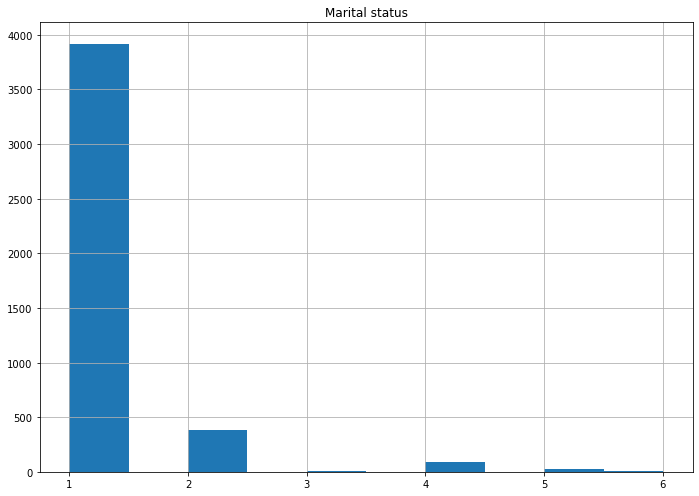

In [330]:
data.hist( column = 'Marital status')
plt.xlabel('Number of Marriages')
plt.ylabel('Number of People')
plt.title('Unscaled Marital Status')
plt.show()
    # outliers - raw data

TypeError: 'str' object is not callable

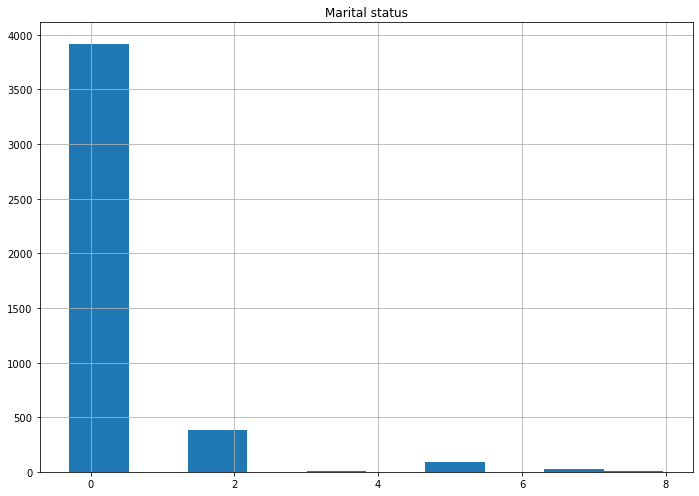

In [283]:
scaled_features.hist( column = 'Marital status' )
plt.xlabel('Number of Marriages')
plt.ylabel('Number of People')
plt.title('Scaled Marital Status')
plt.show()
    # scaled shows a lot more unmarried people, outliers will not skew the data as much

In [331]:
#now creating a correlation table to see what variables are closely related
corr_table = dataset.corr(method='pearson')
corr_table

,Marital status,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
Marital status,1.000000,0.018203,-0.274340,0.121026,-0.020702,0.185451,0.128230,0.069645,0.024280,-0.235162,...,0.034754,0.062896,0.038901,0.022778,-0.043525,-0.071275,0.020465,-0.020099,0.008594,-0.027034
Course,0.018203,1.000000,-0.069024,-0.158734,-0.004832,0.059482,0.046156,0.030013,0.016712,0.006563,...,-0.060638,-0.120649,0.184283,0.047938,0.119546,0.178527,-0.014090,-0.050884,0.029266,-0.012467
Daytime/evening attendance,-0.274340,-0.069024,1.000000,-0.103314,0.024386,-0.195084,-0.137476,-0.037701,0.001065,0.252521,...,0.045577,-0.112200,0.000459,0.014460,0.033360,0.049648,-0.004330,0.061352,-0.023590,0.023020
Previous qualification,0.121026,-0.158734,-0.103314,1.000000,-0.039038,0.019158,0.013408,0.006367,0.005499,-0.149168,...,0.018225,0.138399,0.056012,0.101183,-0.037680,-0.039333,0.024135,0.096601,-0.056149,0.054008
Nacionality,-0.020702,-0.004832,0.024386,-0.039038,1.000000,-0.043759,-0.088826,0.044197,0.024584,-0.010687,...,0.026184,-0.000775,-0.020346,-0.018202,-0.014298,-0.005610,-0.012072,-0.006165,-0.012238,0.044577
Mother's qualification,0.185451,0.059482,-0.195084,0.019158,-0.043759,1.000000,0.524201,0.294850,0.115716,-0.076576,...,0.003440,0.037207,0.034661,0.020081,-0.012104,-0.027089,0.020517,-0.105143,0.055971,-0.079798
Father's qualification,0.128230,0.046156,-0.137476,0.013408,-0.088826,0.524201,1.000000,0.206728,0.183780,-0.055628,...,-0.017661,0.041892,0.025037,0.010535,0.007013,-0.005244,-0.008367,-0.074532,0.056054,-0.070313
Mother's occupation,0.069645,0.030013,-0.037701,0.006367,0.044197,0.294850,0.206728,1.000000,0.723963,-0.038951,...,-0.012480,-0.001929,0.010254,0.012298,0.023000,0.036177,-0.004813,-0.011104,0.014569,0.091830
Father's occupation,0.024280,0.016712,0.001065,0.005499,0.024584,0.115716,0.183780,0.723963,1.000000,-0.019579,...,-0.035241,-0.014511,0.006194,0.001328,0.024119,0.037361,-0.044703,-0.025662,0.007748,0.125541
Displaced,-0.235162,0.006563,0.252521,-0.149168,-0.010687,-0.076576,-0.055628,-0.038951,-0.019579,1.000000,...,-0.021554,-0.091592,-0.040630,-0.037890,0.064669,0.070408,-0.035846,-0.129543,-0.013004,0.062806


In [285]:
# we want to use only the columns necessary for our questions to be answered...
    # those columns include
        # evening/nightmare classes
        # mother/father occupation
        # marital status 
        # age of enrollment
        # previous qualification 
        # scholarships
        # debtor 
        # internaional or not
        # gender

data.columns.unique()

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [286]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [157]:
data.Target.unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [158]:
data.iloc[:, 3].unique()

array([ 2, 11,  5, 15,  3, 17, 12, 10, 14, 16,  6,  8, 13,  9,  4,  1,  7])

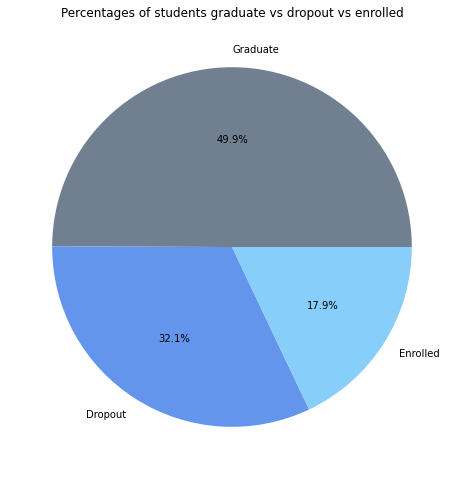

In [159]:
#percentages of students graduate vs dropout vs enrolled
st_summary = dataset['Target'].value_counts()
colors = ( "slategrey", "cornflowerblue", "lightskyblue")
plt.pie(st_summary, colors = colors, labels=st_summary.index, autopct='%1.1f%%')
plt.title('Percentages of students graduate vs dropout vs enrolled')
plt.show()

In [ ]:
#info by gender
colors = ("lightskyblue", "cornflowerblue", "slategrey")
sns.countplot( data=dataset, x='Gender', hue='Target', hue_order=['Enrolled', 'Dropout', 'Graduate'], palette =["lightskyblue", "cornflowerblue", "slategrey"] )
plt.xticks(ticks=[0,1], labels=['Men','Women'])
plt.ylabel('How Many Students')
plt.show()

In [ ]:
plt.figure(figsize=(9,4))

sns.countplot(data=dataset, x='Marital status', hue='Target', hue_order=['Enrolled', 'Dropout', 'Graduate'], palette =["lightskyblue", "cornflowerblue", "slategrey"])

plt.xticks(ticks=[0,1,2,3,4,5], labels=['Single','Married','Widower','Divorced','Facto Union','Legally Seperated'])
plt.xlabel('Marital Status')
plt.ylabel('How many Students')
plt.show()

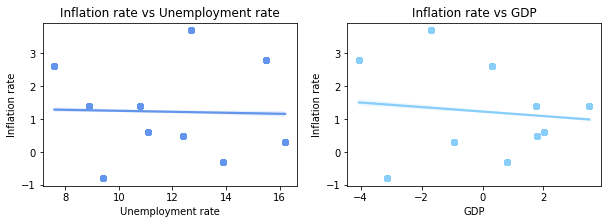

In [183]:
#regression analysis for GDP VS Unemployment rate and Inflation rate
###ploting the regression
from seaborn import regplot  # import regplot function
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 3))

# Plot the first regression line on the first subplot
regplot(data=dataset, y="Inflation rate", x="Unemployment rate", color="cornflowerblue", ax=ax1)

# Plot the second regression line on the second subplot
regplot(data=dataset, y="Inflation rate", x="GDP", color="lightskyblue", ax=ax2)

# Set titles for each subplot
ax1.set_title("Inflation rate vs Unemployment rate")
ax2.set_title("Inflation rate vs GDP")

# Show the plot
plt.show()

TypeError: 'str' object is not callable

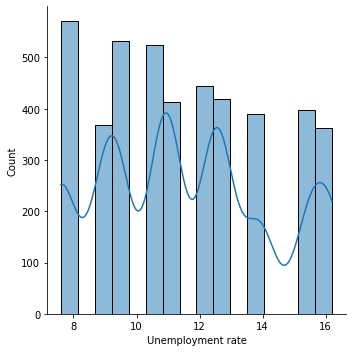

In [184]:
sns.displot(data=dataset, x="Unemployment rate", kde=True)
plt.xlabel('Unemployment Rate')
plt.ylabel('Number of Students')
plt.show()
dataset['Unemployment rate'].describe()

TypeError: 'str' object is not callable

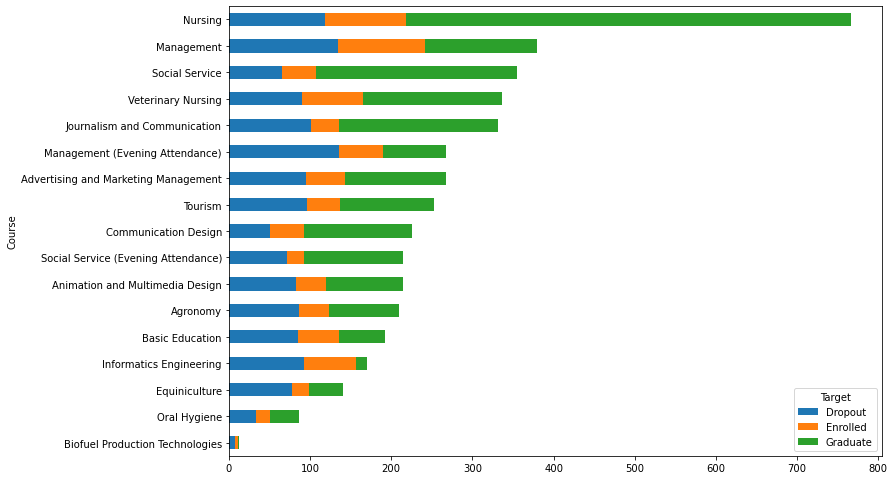

In [185]:
student_course = data.groupby(['Course', 'Target']).size().reset_index().pivot(columns='Target', index='Course', values=0)

# Rename the index of the DataFrame
student_course = student_course.rename(index={1:'Biofuel Production Technologies',2:'Animation and Multimedia Design',3:'Social Service (Evening Attendance)',4:'Agronomy',5:'Communication Design',6:'Veterinary Nursing',7:'Informatics Engineering',8:'Equiniculture',9:'Management',10:'Social Service',11:'Tourism',12:'Nursing',13:'Oral Hygiene',14:'Advertising and Marketing Management',15:'Journalism and Communication',16:'Basic Education',17:'Management (Evening Attendance)'})

student_course_total = student_course.sum(axis=1)
student_course_sorted = student_course_total.sort_values(ascending=True)
student_course.loc[student_course_sorted.index].plot(kind='barh', stacked=True)

plt.xlabel('Number of Students')
plt.show()

TypeError: 'str' object is not callable

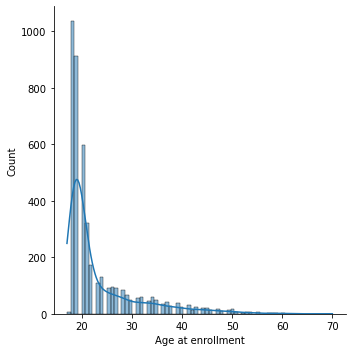

In [186]:
sns.displot(data=data, x='Age at enrollment', kde=True)
data['Age at enrollment'].describe()

plt.xlabel('Age at Enrolment')
plt.ylabel('Number of Students')
plt.show()

In [332]:
encoder = LabelEncoder()
data['Target'] = encoder.fit_transform(data['Target'])
data.head()

,Marital status,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,2,1,1,1,13,10,6,10,1,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,11,1,1,1,1,3,4,4,1,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,5,1,1,1,22,27,10,10,1,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,15,1,1,1,23,27,6,4,1,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,3,0,1,1,22,28,10,10,0,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [333]:
# Set target variable as X and the remaining variables except Nationality and International as Y
X = data.drop(columns=['Nacionality','International','Target'], axis=1)
Y = data['Target']

In [302]:
print(X, X.shape)

      Marital status  Application mode  Application order  Course  \
0                  1                 8                  5       2   
1                  1                 6                  1      11   
2                  1                 1                  5       5   
3                  1                 8                  2      15   
4                  2                12                  1       3   
...              ...               ...                ...     ...   
4419               1                 1                  6      15   
4420               1                 1                  2      15   
4421               1                 1                  1      12   
4422               1                 1                  1       9   
4423               1                 5                  1      15   

      Daytime/evening attendance  Previous qualification  \
0                              1                       1   
1                              1                   

In [334]:
#Splitting Data into Training and Testing Data to begin with the logistic regression as our 
#machine learning model, we split the data into training and testing data. 80% of the data will be our training 
#model and rest 20% will be the testing model. We choose the third state of the random sampling.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [335]:
print(X.shape, X_train.shape, X_test.shape)

(4424, 30) (3539, 30) (885, 30)


In [336]:
bin_log = xgb.XGBClassifier(objective='binary:logistic', n_estimators=1000)
bin_log.fit(X_train, Y_train)

/Users/lindsayspratt/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:16:31] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [337]:
target_prediction = bin_log.predict(X_test)
print(target_prediction)


[2 0 1 2 2 2 2 1 0 1 2 2 2 2 1 0 0 2 2 0 2 2 2 0 2 1 2 0 2 2 2 2 2 0 2 2 1
 0 2 2 2 2 0 2 0 2 2 0 2 2 0 0 2 2 0 1 1 1 0 2 0 2 1 2 2 0 2 1 2 2 2 0 1 2
 2 2 1 0 2 1 2 2 0 1 2 0 2 2 0 2 2 0 2 2 0 1 0 2 1 0 2 2 2 0 0 2 2 0 2 2 2
 1 2 2 2 2 0 2 1 2 2 2 2 2 2 1 2 2 0 0 1 0 0 0 0 2 1 1 1 2 2 0 2 0 0 0 2 2
 1 2 2 2 1 1 2 2 2 0 2 2 2 2 0 0 2 1 2 1 0 2 0 2 2 0 2 2 2 2 2 2 0 0 2 2 2
 2 2 2 2 2 2 0 2 2 0 1 2 2 0 1 2 1 0 2 1 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 0 2
 0 2 2 0 0 2 0 2 2 0 2 1 2 2 0 0 2 1 0 2 2 2 1 2 2 0 0 2 2 2 0 2 2 2 2 2 2
 2 2 2 2 2 0 2 2 2 2 0 2 2 2 1 0 2 2 2 2 0 2 0 0 2 0 0 0 1 1 2 2 2 2 0 2 2
 2 2 1 0 1 2 2 1 1 2 2 0 2 0 0 0 2 2 0 2 1 2 0 2 2 0 1 0 0 0 2 2 2 2 0 2 2
 2 2 2 1 0 0 2 2 0 0 2 2 2 0 1 0 1 2 2 2 1 2 0 2 2 2 2 0 1 0 0 2 0 0 0 2 2
 1 2 2 0 2 0 0 2 2 2 0 2 0 2 0 2 1 2 2 1 0 0 2 0 2 0 2 0 2 2 0 2 0 1 0 1 2
 1 2 2 2 1 2 2 1 1 2 0 1 0 2 0 2 2 2 1 0 2 2 2 1 0 0 2 0 1 2 2 0 2 2 2 2 2
 1 2 2 2 0 2 1 2 0 1 2 2 2 0 1 2 1 0 1 0 2 2 2 2 0 2 1 1 0 0 2 2 0 1 0 0 2
 2 2 2 2 2 0 2 2 0 2 2 2 

In [338]:
data_accuracy = accuracy_score(Y_test, target_prediction)
print("Accuracy:", data_accuracy)

Accuracy: 0.7762711864406779


In [339]:
# The input data is the 192nd record in the student_data dataset disregarding the Nationality and International record
input_data = (1, 1, 2, 14, 1, 1, 1, 3, 5, 4, 0, 0, 0, 1, 0, 0, 19, 0, 5, 5, 5, 13, 0, 0, 5, 5, 5, 13.2, 0, 9.4, 3.2, 1.3) 
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = bin_log.predict(input_data_reshaped)
print(prediction)
print("The initial value is ",prediction[0])

ValueError: Feature shape mismatch, expected: 30, got 32

In [ ]:
from sklearn.feature_selection import VarianceThreshold
var_thr=VarianceThreshold(threshold=0.)
var_thr.fit(data)

In [340]:
var_thr.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [341]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.drop(labels=['Target'], axis=1),
    data['Target'],
    test_size=0.3,
    random_state=0)

In [342]:
from sklearn.feature_selection import mutual_info_classif
mf=mutual_info_classif(X_train,y_train)
mf

array([0.00671185, 0.05560657, 0.        , 0.        , 0.00146473,
       0.03154912, 0.02653035, 0.01764179, 0.02295832, 0.01953287,
       0.02016867, 0.02141852, 0.08771099, 0.01763925, 0.04774589,
       0.04729756, 0.00221813, 0.00140772, 0.04325049, 0.0939459 ,
       0.24269302, 0.1767822 , 0.        , 0.01690182, 0.04078427,
       0.06942107, 0.3090088 , 0.22367662, 0.        , 0.01393509,
       0.00509831, 0.02282816])

In [343]:
mf=pd.Series(mf)
mf.index=X_train.columns
mf.sort_values(ascending=False)

Curricular units 2nd sem (approved)               0.309009
Curricular units 1st sem (approved)               0.242693
Curricular units 2nd sem (grade)                  0.223677
Curricular units 1st sem (grade)                  0.176782
Curricular units 1st sem (evaluations)            0.093946
Tuition fees up to date                           0.087711
Curricular units 2nd sem (evaluations)            0.069421
Course                                            0.055607
Scholarship holder                                0.047746
Age at enrollment                                 0.047298
Curricular units 1st sem (enrolled)               0.043250
Curricular units 2nd sem (enrolled)               0.040784
Mother's qualification                            0.031549
Father's qualification                            0.026530
Father's occupation                               0.022958
GDP                                               0.022828
Debtor                                            0.0214

In [344]:
X_train_chi2=X_train[["Marital status", "Course", "Daytime/evening attendance", "Previous qualification", "Nacionality",
"Mother's qualification",
"Father's qualification",
"Mother's occupation",
"Father's occupation",
"Displaced",
"Debtor", "Gender"]]

In [345]:
from sklearn.feature_selection import chi2
f_score_p=chi2(X_train_chi2,y_train)
f_score_p

(array([ 10.78673053,   3.15665851,   2.24096514, 120.5924575 ,
          9.69059584, 116.84971265,  60.14811563,  46.40816666,
         96.45896671,  19.64477423, 160.13673399, 110.66314568]),
 array([4.54664689e-03, 2.06319518e-01, 3.26122380e-01, 6.51149294e-27,
        7.86527388e-03, 4.23065188e-26, 8.68965717e-14, 8.36747940e-11,
        1.13292592e-21, 5.42239907e-05, 1.68558260e-35, 9.32831582e-25]))

In [346]:
p_values=pd.Series(f_score_p[1])
p_values.index=X_train_chi2.columns
p_values.sort_values()

Debtor                        1.685583e-35
Previous qualification        6.511493e-27
Mother's qualification        4.230652e-26
Gender                        9.328316e-25
Father's occupation           1.132926e-21
Father's qualification        8.689657e-14
Mother's occupation           8.367479e-11
Displaced                     5.422399e-05
Marital status                4.546647e-03
Nacionality                   7.865274e-03
Course                        2.063195e-01
Daytime/evening attendance    3.261224e-01
dtype: float64

In [347]:
#mean squared error (MSE) is the average of the summation of the 
#squared difference between the actual output value and the predicted output value

#Our goal is to reduce the MSE as much as possible
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mean_squared_error(y_test,y_pred)
mean_absolute_error(y_test,y_pred)
r2_score(y_test,y_pred)

0.6321929578200751

In [ ]:
metrica_mean = []
metrica_abs = []
metrica_r2 = []
def best_model(n):
    for i in range(n):
        model = model = RandomForestRegressor(n_estimators=n)
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        metrica_abs.append(mean_absolute_error(y_test,y_pred))
        metrica_mean.append(mean_squared_error(y_test,y_pred))
        metrica_r2.append(r2_score(y_test,y_pred))
    
best_model(250)

ValueError: x and y must have same first dimension, but have shapes (250,) and (0,)

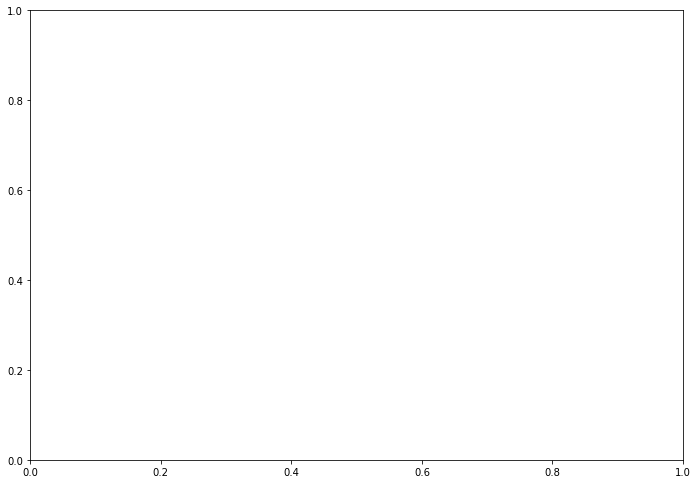

In [173]:
plt.plot(list(range(250)),metrica_mean)

In [ ]:
a = data.groupby('Unemployment rate',as_index=False)["Father's qualification"].mean()
sns.regplot(y="Father's qualification",x='Unemployment rate',data=data)

In [ ]:
a = data.groupby('Unemployment rate',as_index=False)["Mother's qualification"].mean()
sns.regplot(y="Mother's qualification",x='Unemployment rate',data=data)

In [348]:
from sklearn.decomposition import PCA

In [349]:
pca = PCA()
pca.fit(scaled_features)

PCA()

In [350]:
pca.explained_variance_ratio_

array([0.19530555, 0.09658718, 0.07049707, 0.0622513 , 0.05136477,
       0.04834664, 0.0421024 , 0.04172478, 0.03720937, 0.03396737,
       0.03141601, 0.03081032, 0.02816904, 0.02658096, 0.02437374,
       0.02325086, 0.02168475, 0.02038434, 0.01774733, 0.01696748,
       0.01530366, 0.01240181, 0.01102254, 0.00981779, 0.00736885,
       0.00659796, 0.00536273, 0.00399885, 0.00288224, 0.00273843,
       0.00110949, 0.00065438])

ValueError: x and y must have same first dimension, but have shapes (34,) and (32,)

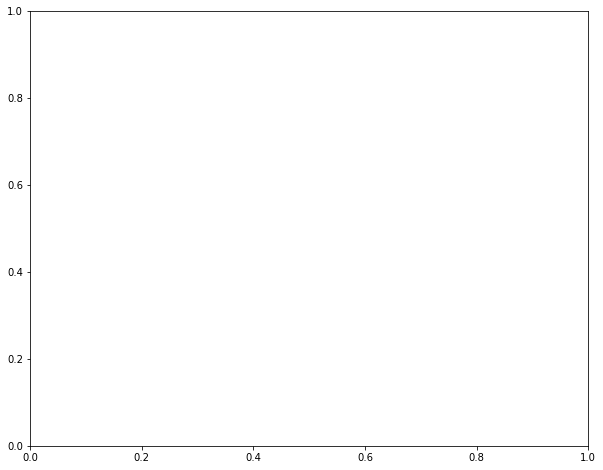

In [351]:
plt.figure(figsize = (10,8))
plt.plot(range(1,35), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variance by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cummulative Explained Variance")

In [28]:
pca = PCA(n_components = 3)
pca.fit(scaled_features)

PCA(n_components=3)

In [73]:
pca.transform(scaled_features)

array([[-5.61626107, -0.19138197,  0.85160804, -0.28400327],
       [-0.29963566, -0.94736723,  1.94614345, -0.15668733],
       [-4.01891262,  0.5108303 , -0.11436125,  0.16547835],
       ...,
       [ 0.66949388, -1.01463783, -1.94757365,  0.01380841],
       [-0.56395159, -1.70173771, -1.25841757, -0.4767444 ],
       [ 0.15217812, -0.95969791, -0.08914745,  6.55488258]])

In [352]:
scores_pca = pca.transform(scaled_features)

In [353]:
wcss = []
for i in range(1,36):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

TypeError: 'str' object is not callable

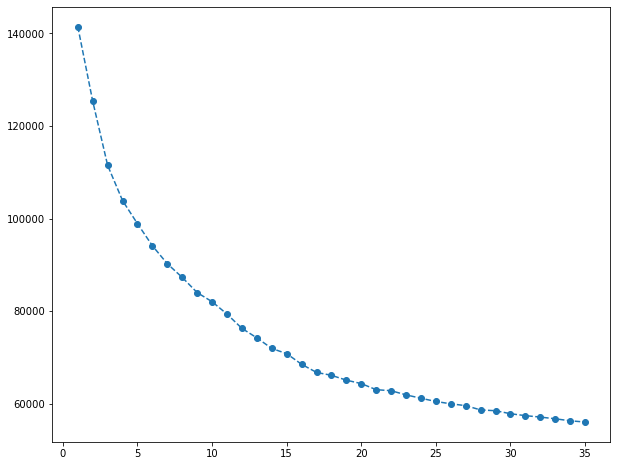

In [354]:
#WCSS = Within-Cluster Sum of square. It is the sum of the squared 
#distance between each point and the centroid in a cluster
plt.figure(figsize = (10,8))
plt.plot(range(1,36), wcss, marker = 'o', linestyle = '--')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("K-means with PCA clustering")
plt.show()

In [355]:
kmeans_pca = KMeans(n_clusters = 4, init = "k-means++", random_state = 42)

In [356]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

In [357]:
df_segm_pca_kmeans = pd.concat([data.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3: ] = ["Component 1", "Component 2", "Component 3"]
df_segm_pca_kmeans["Segment K-Means PCA"] = kmeans_pca.labels_

ValueError: Length of values (4421) does not match length of index (4424)

In [358]:
df_segm_pca_kmeans.head()

,Marital status,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,...,22,23,24,25,26,27,28,Component 1,Component 2,Component 3
0,1,2,1,1,1,13,10,6,10,1,...,0.426870,-0.929981,-0.728783,-0.285212,-0.180948,0.484156,0.073583,0.038598,-0.013316,0.023473
1,1,11,1,1,1,1,3,4,4,1,...,0.391933,-0.082627,-0.001559,0.049619,-0.033284,0.043604,0.009331,0.004943,-0.034461,-0.064914
2,1,5,1,1,1,22,27,10,10,1,...,0.719099,1.125963,0.215205,0.090991,0.083907,-0.443533,-0.095991,-0.038349,-0.045289,-0.073529
3,1,15,1,1,1,23,27,6,4,1,...,-0.143764,-0.219352,0.143270,-0.251773,0.344868,0.224558,-0.117612,-0.062043,0.078106,-0.028584
4,2,3,0,1,1,22,28,10,10,0,...,-0.682116,0.684547,0.073283,0.236603,-0.446133,0.020019,0.165142,0.048855,-0.025363,-0.010696


In [359]:
df_segm_pca_kmeans["Segment"] = df_segm_pca_kmeans["Segment K-Means PCA"].map({0:'first',1:
                                                                               'second', 2:'third', 3:'fourth'})

KeyError: 'Segment K-Means PCA'

In [360]:
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans["Component 1"]
plt.figure(figsize = (10,8))
cluster_graph = sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans["Segment"], palette = ['g','r','c','m'])
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.show()

KeyError: 'Segment'

<Figure size 720x576 with 0 Axes>

In [361]:
km.cluster_centers_

NameError: name 'km' is not defined

In [55]:
inertias

[2242779.458281269,
 1654504.6078855686,
 1469002.8057169665,
 1319367.3271746384,
 1224117.3467425755,
 1141103.3366571192,
 1077511.2040716254,
 992993.5200351322,
 933452.2119357986,
 898963.9442351045,
 871610.733376834,
 845321.4677879512,
 817186.6144192532,
 790875.9302472044,
 774941.9718679538,
 760384.2505902665,
 748551.0907253614,
 728998.8356618723,
 717019.8654154071,
 706527.1882924621,
 694969.3885724813,
 682714.6090502471,
 675310.5033570798,
 659563.0515333869,
 650485.0413329287,
 646044.7251195168,
 638669.0778224103,
 634650.7040078932,
 627493.3995854814,
 617021.5290843534,
 607787.3658608211,
 603638.639571258,
 602106.987120265]

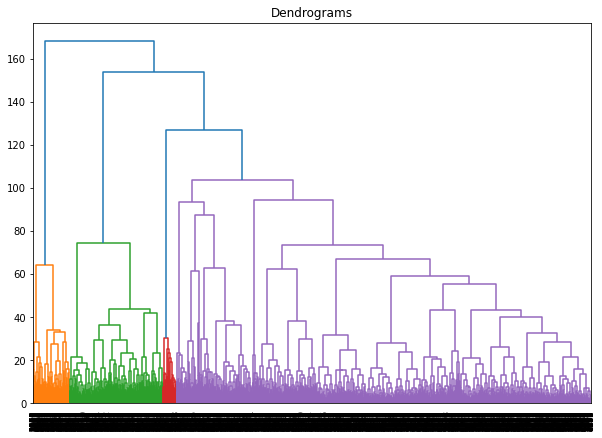

In [402]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
z = shc.linkage(scaled_features, method = "ward")
dend = shc.dendrogram(z, no_labels=False, get_leaves = True, leaf_rotation= 90, leaf_font_size=8)
plt.show()

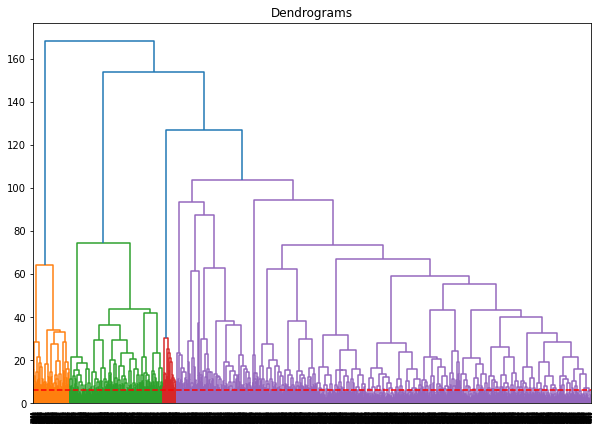

In [363]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(scaled_features, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [364]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(scaled_features)

array([2, 0, 2, ..., 0, 0, 3])

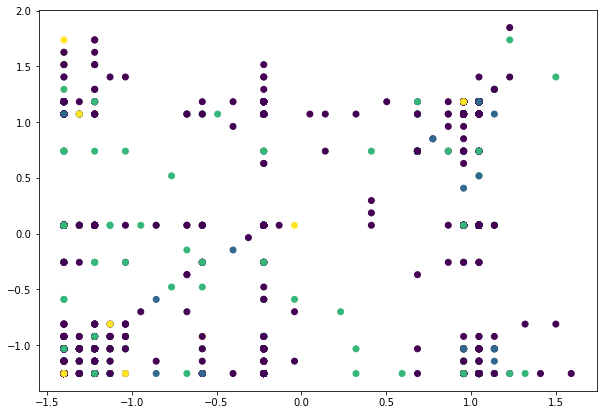

In [365]:

plt.figure(figsize=(10, 7))  
plt.scatter(scaled_features['Father\'s qualification'], scaled_features['Mother\'s qualification'], c=cluster.labels_) 

In [366]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(scaled_features)
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1
# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)
# Adding cluster to the Dataset1
data['cluster'] = cluster
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(data.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Marital status,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
cluster,,,,,,,,,,,,,,,,,,,,,
1.0,1.1,10.2,0.9,2.3,1.2,9.1,13.4,6.6,7.3,0.6,...,0.4,6.3,8.4,4.8,11.1,0.1,11.7,1.1,0.0,1.3
2.0,1.3,8.5,0.8,3.9,1.3,13.5,18.1,7.8,8.1,0.5,...,2.6,8.0,10.2,6.3,11.1,0.2,11.7,1.3,0.2,1.2
3.0,1.2,9.0,0.9,2.7,1.1,12.3,16.0,7.2,7.5,0.5,...,0.4,5.5,6.4,2.7,6.4,0.2,11.5,1.3,-0.2,0.8
4.0,1.2,10.2,0.9,2.5,1.1,15.7,20.0,8.0,8.5,0.5,...,0.4,6.2,8.3,4.7,11.1,0.1,11.4,1.3,-0.0,1.3
5.0,1.1,9.8,0.9,2.5,5.7,10.3,12.0,7.9,8.4,0.6,...,0.7,6.2,7.8,4.2,10.3,0.2,11.7,1.1,0.5,1.2


TypeError: 'str' object is not callable

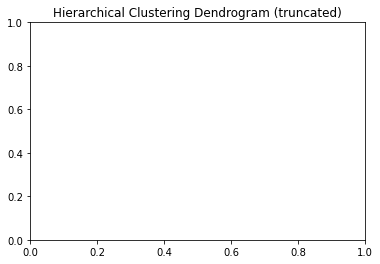

In [367]:
# Hierarchical clustering for the same dataset
# creating a dataset for hierarchical clustering
# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
# some setting for this notebook to actually show the graphs inline
# you probably won't need this
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation
#creating the linkage matrix
H_cluster = linkage(scaled_features,'ward')
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    H_cluster,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=5,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

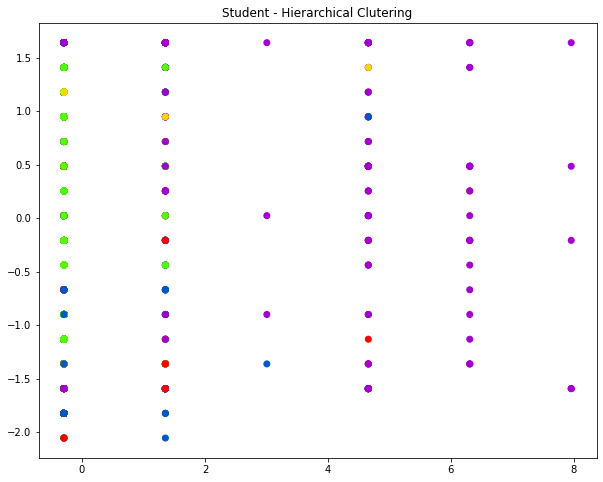

In [368]:
# Assigning the clusters and plotting the observations as per hierarchical clustering
from scipy.cluster.hierarchy import fcluster
k=5
cluster_2 = fcluster(H_cluster, k, criterion='maxclust')
cluster_2[0:30:,]
plt.figure(figsize=(10, 8))
plt.scatter(scaled_features.iloc[:,0], scaled_features.iloc[:,1],c=cluster_2, cmap='prism')  # plot points with cluster dependent colors
plt.title('Student - Hierarchical Clutering')
plt.show()

In [369]:
# New Dataframe called cluster
cluster_Hierarchical = pd.DataFrame(cluster_2)
# Adding the hierarchical clustering to dataset
dataset1=data
dataset1['cluster'] = cluster_Hierarchical
dataset1.head()


,Marital status,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,cluster
0,1,2,1,1,1,13,10,6,10,1,...,0,0,0,0.000000,0,10.8,1.4,1.74,0,2.0
1,1,11,1,1,1,1,3,4,4,1,...,6,6,6,13.666667,0,13.9,-0.3,0.79,2,5.0
2,1,5,1,1,1,22,27,10,10,1,...,6,0,0,0.000000,0,10.8,1.4,1.74,0,2.0
3,1,15,1,1,1,23,27,6,4,1,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,2,5.0
4,2,3,0,1,1,22,28,10,10,0,...,6,6,6,13.000000,0,13.9,-0.3,0.79,2,4.0


In [370]:
data.drop_duplicates(inplace=True)
X = data.iloc[:, [2, 3]].values

In [371]:

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

/Users/lindsayspratt/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/lindsayspratt/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/lindsayspratt/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error o

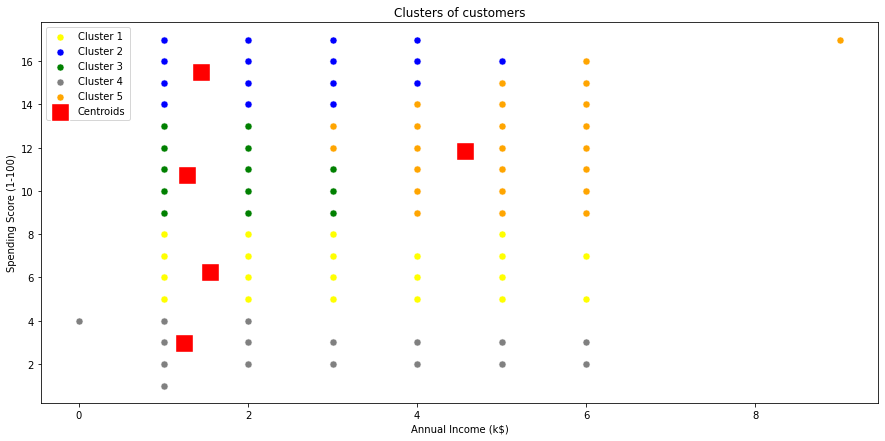

In [87]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of Students')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [372]:
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score

In [373]:
le = LabelEncoder()
le.fit(data['Target'])
data['Target'] = le.transform(data["Target"])

In [374]:
X = data[0:34]
g_matrix = pd.DataFrame.to_numpy(X)

In [375]:
cluster_model = AgglomerativeClustering(n_clusters = 4, affinity = "euclidean", linkage = 'ward')

In [376]:
cluster_labels = cluster_model.fit_predict(g_matrix)

In [377]:
cluster_labels

array([0, 1, 0, 2, 3, 3, 2, 0, 1, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1])

In [378]:
g["pred"] = cluster_labels

NameError: name 'g' is not defined

In [379]:
from scipy.cluster.hierarchy import fcluster

In [380]:
assignments = fcluster(shc.linkage(scaled_features, method = 'complete'),4,'distance')

In [381]:
cluster_output = pd.DataFrame({"Target":data.Target.tolist(), 'cluster':assignments})

In [382]:
cluster_output.head()

,Target,cluster
0,0,551
1,2,921
2,0,613
3,2,1025
4,2,1152


In [383]:
new=pd.merge(cluster_output, data, on = "Target")

In [384]:
new.head()

,Target,cluster_x,Marital status,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,cluster_y
0,0,551,1,2,1,1,1,13,10,6,...,0,0,0,0,0.0,0,10.8,1.4,1.74,2.0
1,0,551,1,5,1,1,1,22,27,10,...,0,6,0,0,0.0,0,10.8,1.4,1.74,2.0
2,0,551,1,11,1,1,1,22,27,10,...,0,5,5,0,0.0,0,15.5,2.8,-4.06,2.0
3,0,551,1,10,1,1,1,1,14,5,...,0,6,14,2,13.5,0,8.9,1.4,3.51,5.0
4,0,551,1,16,1,1,1,13,27,5,...,0,6,0,0,0.0,0,12.7,3.7,-1.70,2.0


In [385]:
new.tail()

,Target,cluster_x,Marital status,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,cluster_y
7519256,1,1322,1,16,1,1,1,3,28,4,...,0,6,9,3,11.666667,0,9.4,-0.8,-3.12,4.0
7519257,1,1322,1,16,1,1,1,1,14,4,...,0,6,6,6,13.000000,0,10.8,1.4,1.74,5.0
7519258,1,1322,1,5,1,1,1,1,28,6,...,0,6,8,2,11.333333,0,10.8,1.4,1.74,4.0
7519259,1,1322,1,5,1,1,1,13,14,8,...,2,6,7,5,12.200000,0,13.9,-0.3,0.79,4.0
7519260,1,1322,1,1,1,1,1,22,1,10,...,2,8,10,2,13.000000,0,12.4,0.5,1.79,1.0


In [386]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [387]:
cols = ["Marital status", "Course", "Daytime/evening attendance", "Previous qualification", "Nacionality",
"Mother's qualification",
"Father's qualification",
"Mother's occupation",
"Father's occupation",
"Displaced",
"Debtor",]
num = data[cols]
X = dataset.iloc[:, :34].values

In [388]:
X = scale(X)

ValueError: could not convert string to float: 'Dropout'

In [389]:
pca = PCA(n_components = 3)
pca.fit(X)

ValueError: could not convert string to float: 'Dropout'

In [390]:
var = pca.explained_variance_ratio_

AttributeError: 'PCA' object has no attribute 'explained_variance_ratio_'

In [391]:
x_pca = pca.transform(scaled_features)
x_pca_2d = pd.DataFrame(x_pca)

x_pca_2d.columns = ["PC1", "PC2", "PC3"]
x_pca_2d.head()

NotFittedError: This PCA instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [392]:
print(pca.explained_variance_ratio_)

AttributeError: 'PCA' object has no attribute 'explained_variance_ratio_'

ValueError: 'c' argument has 4421 elements, which is inconsistent with 'x' and 'y' with size 4424.

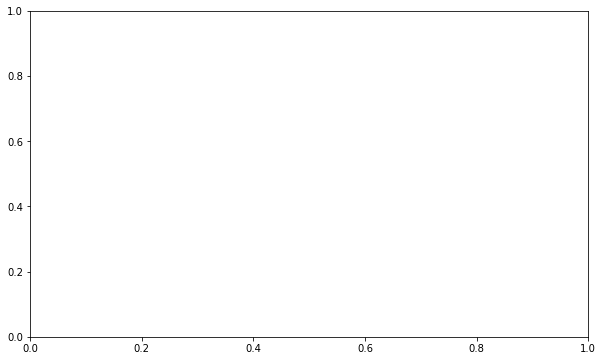

In [393]:
plt.figure(figsize = (10,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c = data["Marital status"], cmap = 'plasma')
plt.xlabel = "First Principal Component"
plt.ylabel = "Second Principal Component"
plt.title("Principal Component Clusters")
plt.show()

In [220]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [76]:
X = data.loc[:, "Application mode":"GDP"]
y = kmeans_pca.labels_

In [78]:
pca = PCA(n_components = 4)
X_pca = pca.fit_transform(scaled_features)

In [79]:
from sklearn.manifold import TSNE
tsne = TSNE()
X_tsne = tsne.fit_transform(X_pca[:10000])


NameError: name 'kmeans' is not defined

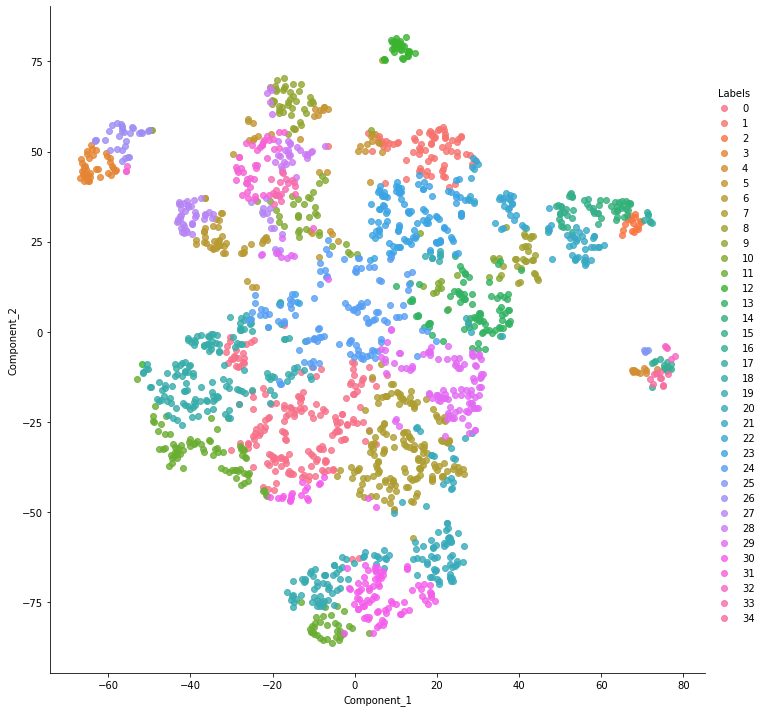

In [226]:
plt.rcParams['figure.figsize'] = (11.7,8.27)
proj = pd.DataFrame(X_tsne)
proj.columns = ["Component_1", "Component_2"]
proj["Labels"] = y
sns.lmplot(height=10, x="Component_1", y="Component_2", hue = "Labels", data = proj.sample(2000), fit_reg = False)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.title("Clustering based on ALL Features")
plt.figure(figsize=(10, 10))
plt.show()


In [267]:
# Create a data frame containing our centroids
KMeans.fit(X, Y)
centroids = pd.DataFrame(KMeans.cluster_centers_, columns=X.columns)
centroids['cluster'] = centroids.index

display_parallel_coordinates_centroids(centroids, 10)

AttributeError: 'numpy.ndarray' object has no attribute '_validate_data'

In [131]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [133]:
names = ["Marital status", "Course", "Daytime/evening attendance", "Previous qualification", "Nacionality",
"Mother's qualification",
"Father's qualification",
"Mother's occupation",
"Father's occupation",
"Displaced",
"Debtor"]

df = pd.read_csv(path, names = names)

In [134]:
df.head()

Marital status  \
Marital status Application mode Application order Course Daytime/evening attendance Previous qualification Nacionality Mother's qualification Father's qualification Mother's occupation Father's occupation Displaced Educational special needs Debtor Tuition fees up to date Gender Scholarship holder Age at enrollment International Curricular units 1st sem (credited) Curricular units 1st sem (enrolled) Curricular units 1st sem (evaluations) Curricular units 1st sem (approved) Curricular units 1st sem (grade)  Curricular units 1st sem (without evaluations)   
1              8                5                 2      1                          1                      1           13                     10                     6                   10                  1         0                         0      1                       1      0                  20                0             0                                   0                                   0                                      0                                   0.0                                                                            0   
               6                1                 11     1                          1                      1           1                      3                      4                   4                   1         0                         0      0                       1      0                  19                0             0                                   6                                   6                                      6                                   14.0                                                                           0   
               1                5                 5      1                          1                      1           22                     27                     10                  10                  1         0                         0      0                       1      0                  19                0             0                                   6                                   0                                      0                                   0.0                                                                            0   
               8                2                 15     1                          1                      1           23                     27                     6                   4                   1         0                         0      1                       0      0                  20                0             0                                   6                                   8                                      6                                   13.428571428571429                                                             0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Course  \
Marital status Application mode Application order Course Daytime/evening attendance Previous qualification Nacionality Mother's qualification Father's qualification Mother's occupation Father's occupation Displaced Educational special needs Debtor Tuition fees up to date Gender Scholarship holder Age at enrollment International Curricular units 1st sem (credited) Curricular units 1st sem (enrolled) Curricular units 1st sem (evaluations) Curricular units 1st sem (approved) Curricular units 1st sem (grade)  Curricular units 2nd sem (credited)   
1              8                5                 2      1                  

In [235]:
array = df.values

In [237]:
X = array[:, 0:10]
Y = array[:,10]

In [238]:
test = SelectKBest(score_func = chi2, k = 3)
fit = test.fit(X,Y)
np.set_printoptions(precision = 3)
print(fit.scores_)

ValueError: could not convert string to float: 'Curricular units 1st sem (without evaluations)'

In [260]:
X = array[:, 0:10]
clusters =  KMeans.predict(X)
# Add the cluster number to the original scaled data
X_clustered = pd.DataFrame(X, index=X.index, columns=X.columns)
X_clustered["cluster"] = clusters

# Display parallel coordinates plots, one for each cluster
display_parallel_coordinates(X_clustered, 3)

TypeError: predict() missing 1 required positional argument: 'X'

In [394]:
proj["Labels"] = y
X = data.loc[:, "Application mode":"GDP"]
X = X.fillna(X.mean()) 
X_scaled = scaler.fit_transform(X)

_clustered = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
pd.plotting.parallel_coordinates(
    X_clustered, "Gender", color=('#556270', '#4ECDC4', '#C7F464'))
plt.xticks(rotation=90)
plt.title("Parallel Coordinates Plot for Clusters")

KeyError: 'Application mode'